In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df = pd.read_csv('KeralaFinalDataSet.csv')
# df = df.drop("Unnamed: 0", axis=1)

In [45]:
df.head()

,Year,Month,Time format,No. of flights,No. of hotels booked,Tourism_in_Kerala,kerala_tourism_package,Tourist_places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min,Tourists,kerala_tourist_hotels
0,2010.0,Jan,1/1/2010,2990.0,514000.0,87.0,67.0,10.0,51.0,78.0,0.0,35.0,6.8313,29.35,15.42,818356.0,83
1,2010.0,Feb,2/1/2010,2810.0,457000.0,83.0,78.0,18.0,44.0,72.0,0.0,35.0,20.1979,31.79,16.11,721201.0,64
2,2010.0,Mar,3/1/2010,3140.0,417000.0,93.0,50.0,9.0,47.0,66.0,0.0,90.0,66.8573,33.31,18.42,719944.0,58
3,2010.0,Apr,4/1/2010,2670.0,434000.0,95.0,97.0,9.0,49.0,65.0,0.0,100.0,94.4786,33.71,20.62,735432.0,68
4,2010.0,May,5/1/2010,2520.0,488000.0,90.0,69.0,0.0,54.0,64.0,0.0,56.0,112.6957,33.06,19.15,803431.0,100


In [40]:
df=df.iloc[:,3:]

In [22]:
# Drop columns in-place
df.drop(['Month'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1=df.drop("Month", axis=1)
df_normalized = scaler.fit_transform(df1)
df_normalized = pd.DataFrame(data=df_normalized)

In [ ]:
df_normalized.columns=df1.columns

In [ ]:
df_normalized.columns

In [ ]:
# Plot each feature against "Total Tourists"
features = list(df_normalized.columns)
features.remove('Total Tourists')

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df_normalized.index, df_normalized['Total Tourists'], label='Total Tourists', marker='o', linestyle='-')
    plt.plot(df_normalized.index, df_normalized[feature], label=feature, marker='o', linestyle='-')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'{feature} vs Total Tourists')
    plt.legend()
    plt.grid()
    plt.show()

Correlation Matrix

<IPython.core.display.Javascript object>

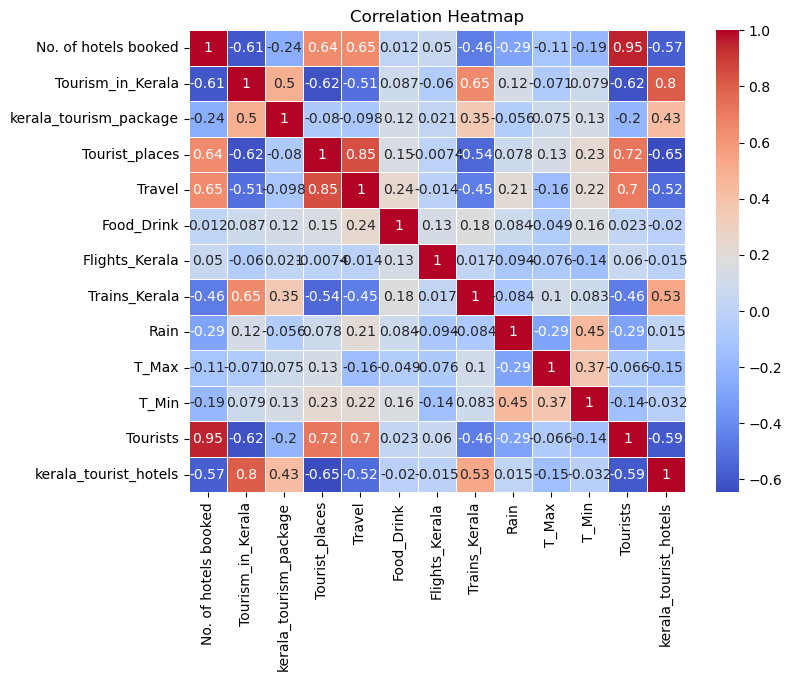

In [26]:
corrmat = df.iloc[:108].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Line Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Assuming df is your DataFrame
sns.lineplot(x='Year', y='Tourists', data=df)
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.title('Total Tourists Over the Years')
plt.show()


Bar Plot

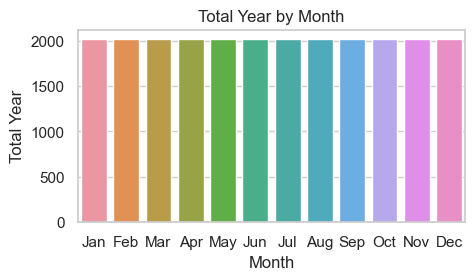

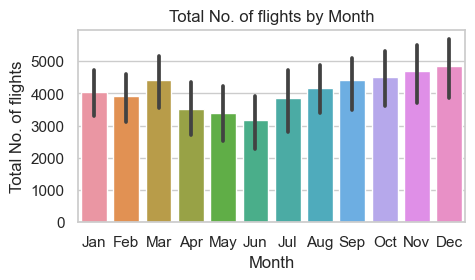

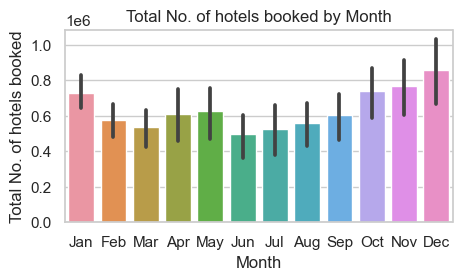

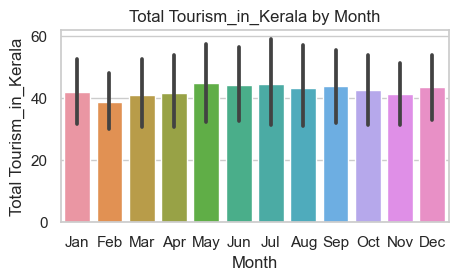

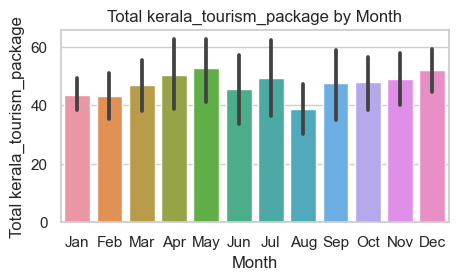

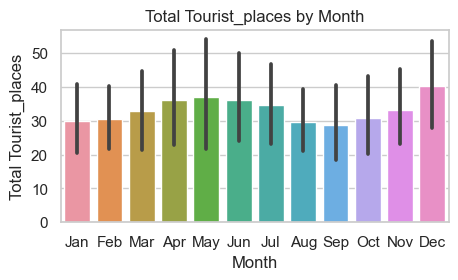

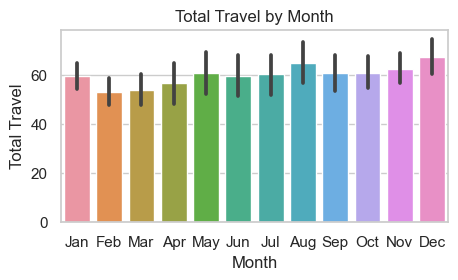

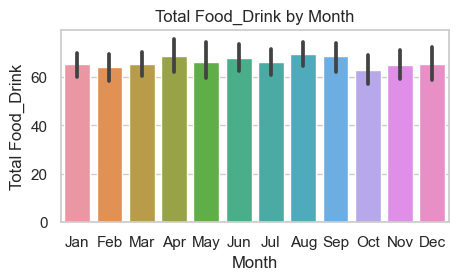

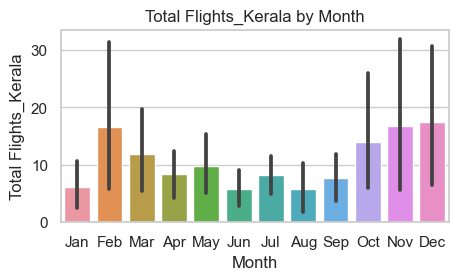

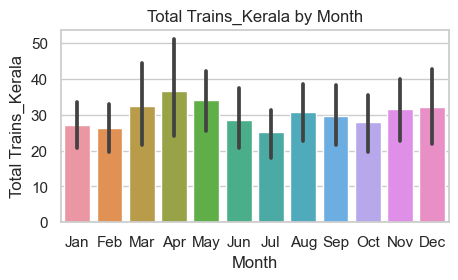

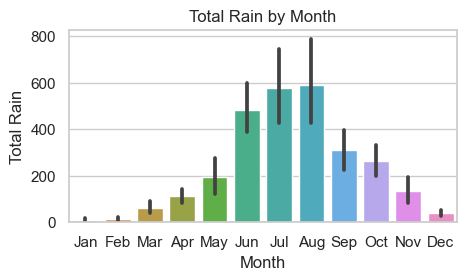

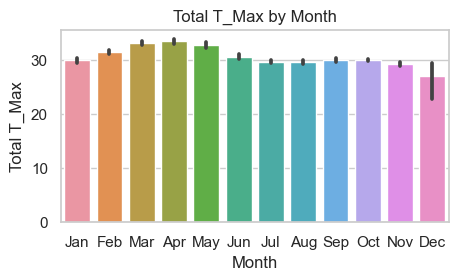

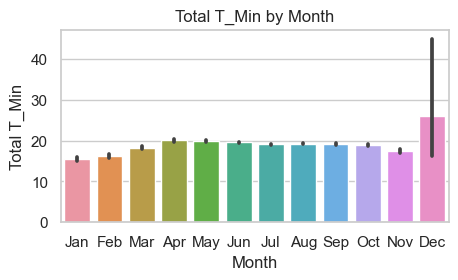

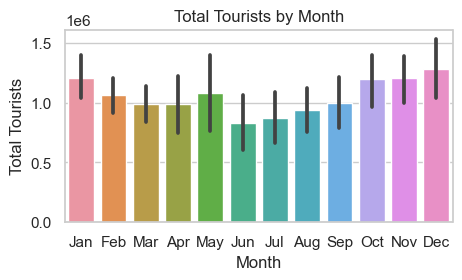

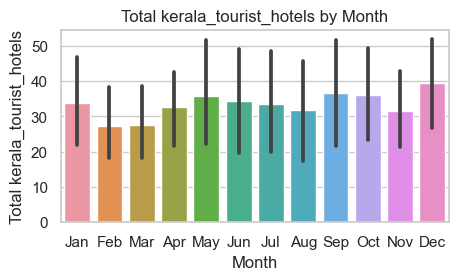

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(exclude=['object'])

for column in numerical_columns:
    plt.figure(figsize=(5, 2.5))  # Set the figure size
    sns.barplot(x='Month', y=column, data=df)
    plt.xlabel('Month')
    plt.ylabel(f'Total {column}')
    plt.title(f'Total {column} by Month')
    plt.show()


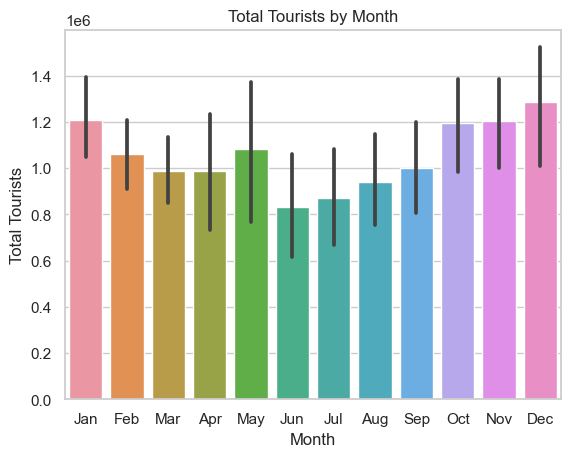

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Assuming df is your DataFrame
sns.barplot(x='Month', y='Tourists', data=df)
plt.xlabel('Month')
plt.ylabel('Total Tourists')
plt.title('Total Tourists by Month')
plt.show()


Scatter Plot

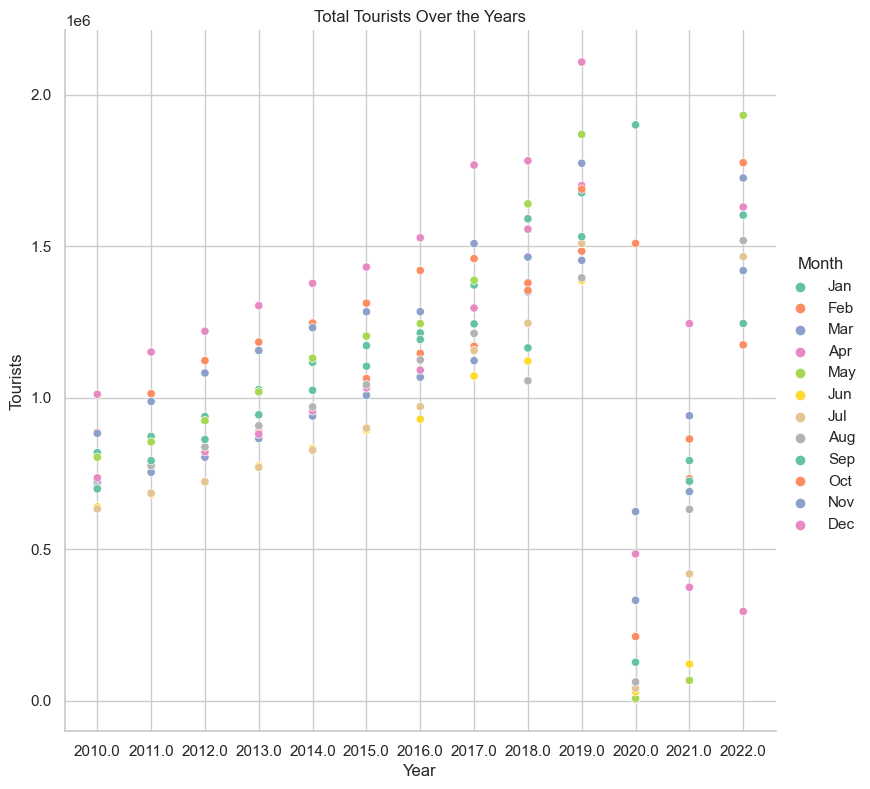

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style to a different Seaborn theme (e.g., "whitegrid")
sns.set(style="whitegrid")

# Get unique years from your data
years = df['Year'].unique()

# Create a Seaborn relplot for visualization with a custom palette
# You can specify a different palette using the 'palette' parameter
sns.relplot(x='Year', y='Tourists', hue='Month', data=df, palette="Set2", height=8, aspect=1)

# Set the x-axis ticks to show only unique years
plt.xticks(ticks=years, labels=years)

# Set the title for the plot
plt.title("Total Tourists Over the Years")

plt.show()


Histogram

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Assuming df is your DataFrame
sns.histplot(df['Total Tourists'], kde=True)
plt.xlabel('Total Tourists')
plt.ylabel('Frequency')
plt.title('Distribution of Total Tourists')
plt.show()


KeyError: 'Total Tourists'

Pie chart

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group the data by month and calculate the total tourists in each month
monthly_totals = df.groupby('Month')['Total Tourists'].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(monthly_totals, labels=monthly_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Tourists by Month')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of features (columns) you want to create scatter plots for
features_to_plot = df.columns  # Replace with your actual column names

# Create separate scatter plots with linear regression lines for each feature
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.lmplot(x='Year', y=feature, data=df, hue='Month')
    plt.title(f'Scatter Plot with Linear Regression Line for {feature}')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of months you want to create scatter plots for
months_to_plot = df['Month'].unique()  # Assuming 'Month' is a column in your DataFrame

# Create separate scatter plots with linear regression lines for each month
for month in months_to_plot:
    month_data = df[df['Month'] == month]
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.lmplot(x='Year', y='Total Tourists', data=month_data)
    plt.title(f'Scatter Plot with Linear Regression Line for {month}')
    plt.xlabel('Year')
    plt.ylabel('Total Tourists')
    plt.show()
